In [2]:
library(tidyverse)


# Importer les cleaned data

In [95]:
data_clean <- read.csv(
  "data_cleaned.csv",
  header = TRUE,
  sep = ",",
  quote = "\"", 
  stringsAsFactors = FALSE)



head(data_clean)
attach(data_clean)

Individual_ID Predator                   Predator_taxon      
1 1             Rhizoprionodon terraenovae ectotherm vertebrate
2 2             Rhizoprionodon terraenovae ectotherm vertebrate
3 3             Rhizoprionodon terraenovae ectotherm vertebrate
4 4             Rhizoprionodon terraenovae ectotherm vertebrate
5 5             Rhizoprionodon terraenovae ectotherm vertebrate
6 6             Rhizoprionodon terraenovae ectotherm vertebrate
  Predator_lifestage Type_of_feeding_interaction Standardised_predator_length
1 adult              predacious/piscivorous       93.990                     
2 adult              predacious/piscivorous       95.195                     
3 adult              predacious/piscivorous      100.020                     
4 adult              predacious/piscivorous       34.945                     
5 adult              predacious/piscivorous       31.330                     
6 adult              predacious/piscivorous       33.740                     
  SI_predator_mass Diet_coverage Prey                          Prey_taxon ⋯
1 1539.900         all           teleosts/molluscs/crustaceans mixed      ⋯
2 1597.800         all           teleosts/molluscs/crustaceans mixed      ⋯
3 1843.600         all           teleosts/molluscs/crustaceans mixed      ⋯
4   87.631         all           teleosts/molluscs/crustaceans mixed      ⋯
5   63.866         all           teleosts/molluscs/crustaceans mixed      ⋯
6   79.161         all           teleosts/molluscs/crustaceans mixed      ⋯
  SI_prey_mass Geographic_location             Latitude Longitude Depth
1 14.2740      ""Apalachicola Bay"," Florida"" 29""40'N 85""10'W  30   
2  6.0213      ""Apalachicola Bay"," Florida"" 29""40'N 85""10'W  30   
3 11.8930      ""Apalachicola Bay"," Florida"" 29""nN   85""10'W  30   
4  8.1220      ""Apalachicola Bay"," Florida"" 29""40'N 85""10'W  30   
5  6.5623      ""Apalachicola Bay"," Florida"" 29""40'N 85""10'W  30   
6  5.4065      ""Apalachicola Bay"," Florida"" 29""40'N 85""10'W  30   
  Mean_annual_temp SD_annual_temp Mean_PP SD_PP Specific_habitat
1 24.1             4.2            866     214   Coastal Bay     
2 24.1             4.2            866     214   Coastal Bay     
3 24.1             4.2            866     214   Coastal Bay     
4 24.1             4.2            866     214   Coastal Bay     
5 24.1             4.2            866     214   Coastal Bay     
6 24.1             4.2            866     214   Coastal Bay

The following objects are masked from data_clean (pos = 3):

    Depth, Diet_coverage, Geographic_location, Individual_ID, Latitude,
    Longitude, Mean_annual_temp, Mean_PP, Predator, Predator_lifestage,
    Predator_taxon, Prey, Prey_taxon, SD_annual_temp, SD_PP,
    SI_predator_mass, SI_prey_length, SI_prey_mass, Specific_habitat,
    Standardised_predator_length, Type_of_feeding_interaction




# Log transform of predator and prey length and mass 
predator and prey length and mass are log transformed and rounded to 1 number after ','
The histogram shows that rounding to 1 digit doesn't change the distribution too much.

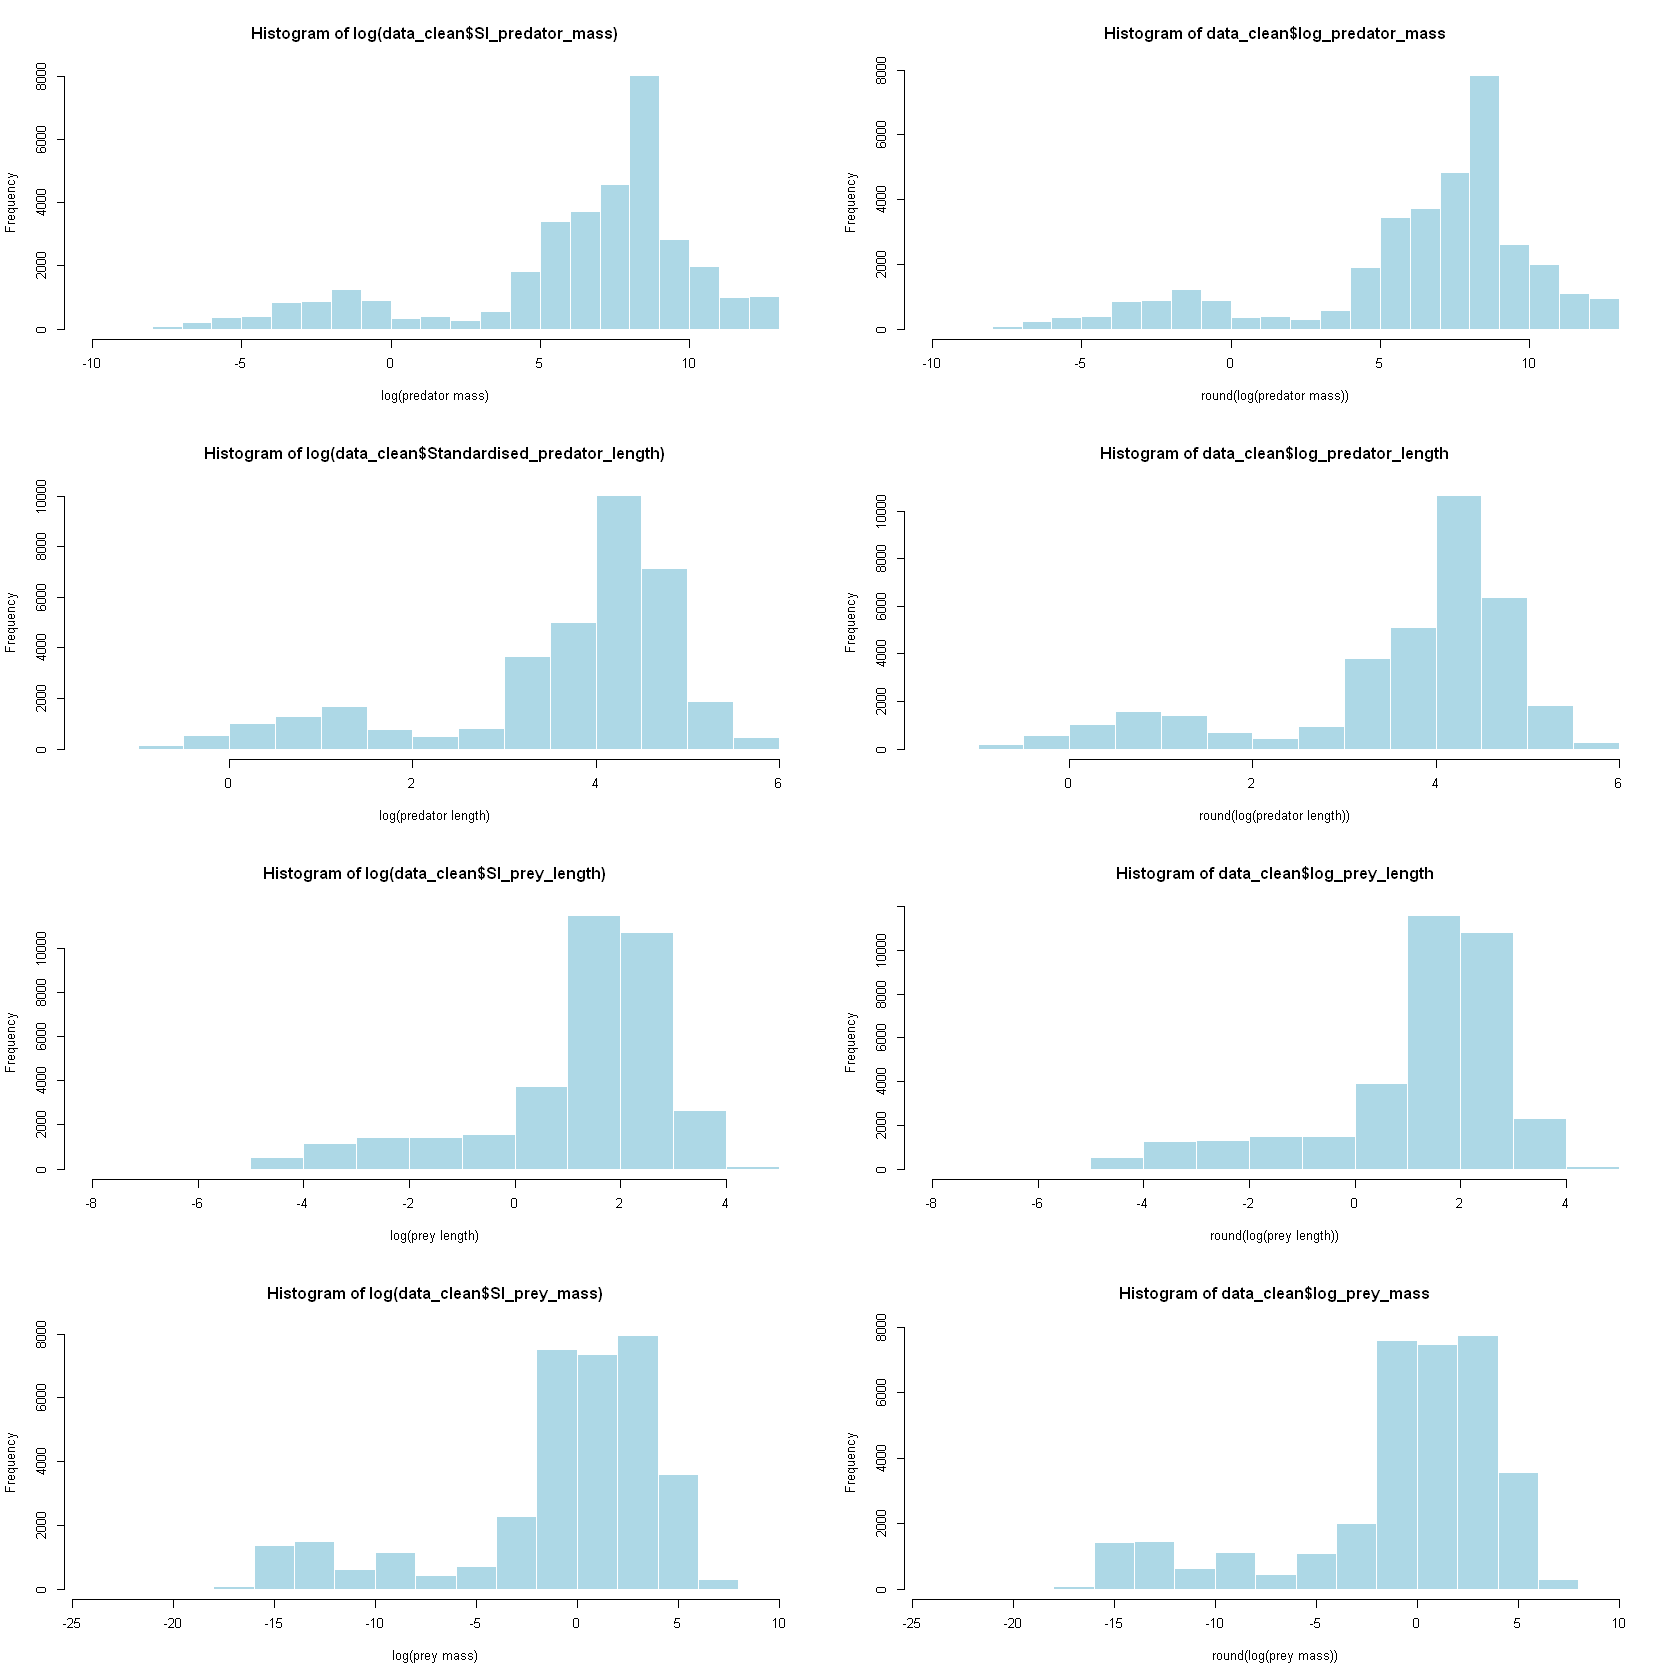

In [96]:
data_clean$log_predator_mass <- round(log(data_clean$SI_predator_mass),digits = 1)
data_clean$log_predator_length <- round(log(data_clean$Standardised_predator_length),digits = 1)
data_clean$log_prey_mass <- round(log(data_clean$SI_prey_mass),digits = 1)
data_clean$log_prey_length <- round(log(data_clean$SI_prey_length),digits = 1)

options(repr.plot.width = 14, repr.plot.height = 14)

par(mfrow = c(4, 2))
#predator mass
hist(log(data_clean$SI_predator_mass), xlab="log(predator mass)",
         col = "lightblue", border="white")
hist(data_clean$log_predator_mass, xlab="round(log(predator mass))",
         col = "lightblue", border="white")

#predator length
hist(log(data_clean$Standardised_predator_length), xlab="log(predator length)",
         col = "lightblue", border="white")    
hist(data_clean$log_predator_length, xlab="round(log(predator length))",
         col = "lightblue", border="white") 

#prey length
hist(log(data_clean$SI_prey_length), xlab="log(prey length)",
         col = "lightblue", border="white")    
hist(data_clean$log_prey_length, xlab="round(log(prey length))",
         col = "lightblue", border="white")    

#prey mass
hist(log(data_clean$SI_prey_mass), xlab="log(prey mass)",
         col = "lightblue", border="white")    
hist(data_clean$log_prey_mass, xlab="round(log(prey mass))",
         col = "lightblue", border="white")    


## Remove non log transformed predator and prey lenght and mass

In [ ]:
drop <- c("Standardised_predator_length","SI_predator_mass" ,"SI_prey_length","SI_prey_mass")
data_standardized = data_clean[,!(names(data_clean) %in% drop)]

# Remove duplicate rows


In [98]:
library(dplyr)
data_unique <- data_standardized %>% distinct()

print("Number of duplicate rows removed:")
nrow(data_standardized) - nrow(data_unique)

[1] "Number of duplicate rows removed:"


[1] 7263

# Remplacer ID

In [99]:
# Trouver les lignes avec ID manquant
missing_idx <- which(data_unique$Individual_ID == "n/a" | is.na(data_unique$Individual_ID))

# Convertir la colonne en numérique (si elle est encore de type "character")
# Les "n/a" deviendront NA
data_unique$Individual_ID <- suppressWarnings(as.numeric(data_unique$Individual_ID))

# Trouver le plus grand ID existant pour continuer la numérotation
max_id <- max(data_unique$Individual_ID, na.rm = TRUE)

# Créer de nouveaux IDs pour les lignes manquantes
new_ids <- seq(from = max_id + 1, length.out = length(missing_idx))

# Remplacer les valeurs manquantes
data_unique$Individual_ID[missing_idx] <- new_ids


In [102]:
library(data.table)
fwrite(data_unique, "data_cleaned_2.csv")

Warning message:
"package 'data.table' was built under R version 4.4.3"

Attaching package: 'data.table'


The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose


